In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)


2017-08-23


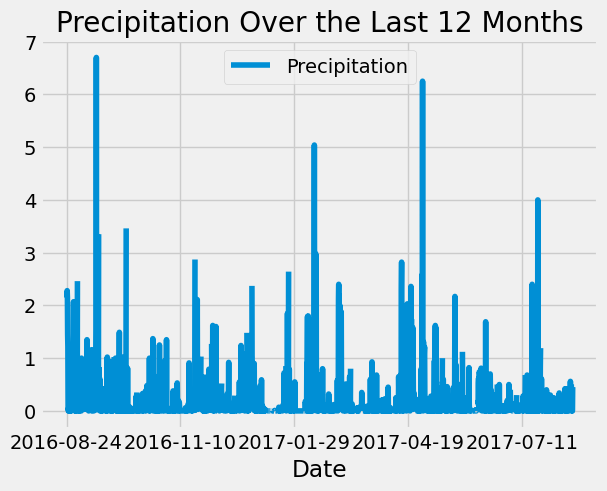

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_date

# Calculate the date one year from the last date in data set.
most_recent_date_datetime = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
twelve_months_ago = most_recent_date_datetime - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_prcp_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > twelve_months_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(one_year_prcp_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by=['Date'], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', kind='line', title='Precipitation Over the Last 12 Months', legend=True)
plt.show()

In [22]:
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.station)
stations.count()

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
list_of_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(list_of_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = list_of_stations[0][0]
max_temp = session.query(func.max(Measurement.tobs)).\
        filter(Measurement.station == most_active_station).scalar()
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).scalar()
mean_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).scalar()

In [26]:
print(f"Maximum Temperature: {max_temp} °F")
print(f"Minimum Temperature: {min_temp} °F")
print(f"Mean Temperature: {mean_temp:.2f} °F")

Maximum Temperature: 85.0 °F
Minimum Temperature: 54.0 °F
Mean Temperature: 71.66 °F


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == most_active_station).scalar()

In [28]:
most_recent_date_datetime = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
twelve_months_ago = most_recent_date_datetime - dt.timedelta(days=365)

In [29]:
one_year_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > twelve_months_ago).all()


In [30]:
df = pd.DataFrame(one_year_temp, columns=['Date', 'Temperature'])

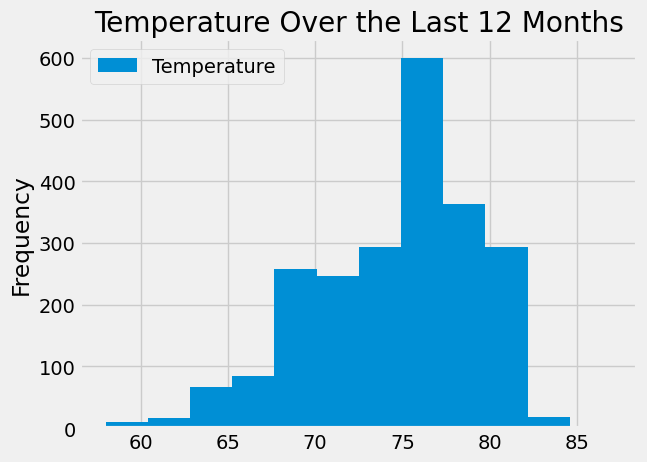

In [31]:
df.plot(x='Date', y='Temperature', kind='hist', title='Temperature Over the Last 12 Months', legend=True, bins=12)
plt.show()


In [32]:
# Close Session
session.close()